<a href="https://colab.research.google.com/github/ndtuan10/DeepLearning_CS431.L21.KHCL/blob/main/BaiTap/BaiTap5_Word2vec_CBOW_FastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÀI TẬP 3**

**Môn : Các kỹ thuật học sâu và ứng dụng - CS313.L11.KHCL**
 
***Yêu cầu:*** Word2Vec sử dụng mô hình Continuous Bag-of-Word (CBOW).
- `Word2Vec` là một kỹ thuật sử dụng một mô hình mạng thần kinh `(Neural Network)` được dùng trong xử lý ngôn ngữ tự nhiên `(Natural Language Processing - NLP)` để học các liên kết từ (sự liên quan của từ) từ một kho ngữ liệu văn bản có dung lượng lớn. Sau khi được huấn luyện, mô hình có thể phát hiện các từ đồng nghĩa hoặc gợi ý các từ bổ sung cho một phần của câu.
- Word2Vec (2013) bởi `Google`, gồm 2 mô hình `Skip-gram` và `Continuous Bag-of-Word (CBOW)` cùng với đó là 2 kỹ thuật để tăng tốc việc huấn luyện: Hierachical Softmax và Negative Sampling.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from gensim.models import KeyedVectors
import numpy as np

# **Load model**
- `FastText` là một thư viện mã nguồn mở, miễn phí, nhẹ do đội ngũ `Facebook` tạo ra cho phép người dùng tìm hiểu các cách biểu diễn văn bản và phân loại văn bản. 
- Chi tiết có thể tham khảo trên trang FastText https://fasttext.cc/docs/en/english-vectors.html. 
- Tải và giải nén mô hình [pretrained word vectors](https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip), nặng 2.26Gb gồm 1 triệu vector được ánh xạ thành 1 vector 300 chiều từ được huấn luyện trên Wikipedia 2017, kho dữ liệu webbase của UMBC và tập dữ liệu tin tức statmt.org.
- Đối với các ngôn ngữ khác, trong đó có tiếng Việt ta có thể tải về từ đây:
https://fasttext.cc/docs/en/crawl-vectors.html

Thời gian load mô hình đã huấn luyện này có thể mất từ 5-10 phút )-:


In [3]:
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Các kỹ thuật học sâu - CS431/wiki-news-300d-1M.vec', binary=False)

# **Word embeding: biểu diễn một từ dưới dạng một vector**
- Ánh xạ một từ sang vector biểu diễn của từ đó. Vector biểu diễn của từ này gồm 300 chiều.

In [4]:
pig_vec = word_vectors['pig']
print('Feature representation of `pig` is:', pig_vec)
print('Size of feature representation: ', pig_vec.shape)

Feature representation of `pig` is: [-9.410e-02 -1.357e-01  1.006e-01  1.834e-01 -3.390e-02 -5.000e-02
  3.030e-02  1.610e-01  4.130e-02 -4.400e-02  1.794e-01  1.555e-01
 -5.740e-02 -9.010e-02  1.800e-03 -1.606e-01  5.890e-02 -5.210e-02
 -4.230e-02 -1.699e-01 -1.714e-01  1.358e-01  1.675e-01 -1.190e-02
 -2.348e-01 -1.440e-02  2.530e-02  2.203e-01  1.974e-01  5.890e-02
  1.239e-01  7.820e-02 -7.270e-02  1.001e-01  1.182e-01 -5.370e-02
 -8.160e-02  3.190e-02 -9.890e-02 -1.063e-01  2.378e-01 -2.410e-02
  4.770e-02 -6.330e-02  6.090e-02  4.850e-02 -1.289e-01  2.400e-01
 -7.970e-02 -2.690e-02  1.038e-01 -9.890e-02 -7.042e-01 -1.317e-01
 -2.311e-01  1.940e-01  6.400e-02  1.248e-01  1.127e-01  3.940e-02
 -2.950e-02 -1.198e-01 -1.397e-01 -4.700e-03  7.390e-02 -4.480e-02
 -8.350e-02  4.740e-02 -2.609e-01  8.160e-02 -1.053e-01 -1.245e-01
  1.404e-01  1.130e-01  1.048e-01  6.820e-02  5.750e-02 -6.900e-03
 -2.880e-02  6.210e-02 -2.320e-02  9.440e-02 -1.885e-01 -2.067e-01
 -1.468e-01  1.591e-01  1.

## **Tính khoảng cách giữa hai vector từ**

In [5]:
him_vec = word_vectors['him']
her_vec = word_vectors['her']
student_vec = word_vectors['student']
# Khoảng cách 
print('Distance: ')
print('him - her = ', np.linalg.norm(him_vec - her_vec))
print('him - student = ', np.linalg.norm(him_vec - student_vec))

# Tích vô hướng 2 vector từ (correlation)
print('Correlation: ')
print('him . her = ', np.dot(him_vec, her_vec))
print('him . student = ', np.dot(him_vec, student_vec))

Distance: 
him - her =  1.3788106
him - student =  1.8188329
Correlation: 
him . her =  1.4121481
him . student =  1.158534


**Nhận xét**: 
- Ta thấy `him-her` có khoảng cách (distance) gần hơn `him-student`. Lí do là vị trí chức năng của `him` và `her` tương đồng nhau hơn so với `him` và `student`.
- Trong độ đo tương quan (correlation) thì càng tương đồng nhau thì có `correlation` lớn. Do đó giá trị của `him . her` cao hơn giá trị của `him . student`.

In [6]:
love_vec = word_vectors['love']
like_vec = word_vectors['like']
hate_vec = word_vectors['hate']

# Tích vô hướng 2 vector từ (correlation)
print('Correlation: ')
print('love . like = ', np.dot(love_vec, like_vec))
print('love . hate = ', np.dot(love_vec, hate_vec))

Correlation: 
love . like =  1.6091172
love . hate =  2.8157127


**Nhận xét**: 
- Ta thấy `love . like` có độ tương đồng thấp hơn so với `love . hate` mặc dù thông thường ta sẽ nghĩ từ `love` và từ `like` sẽ gần nghĩa hơn từ `love` và từ `hate`. Vì ở đây, độ đo này không quan tâm yếu tố ngữ nghĩa mà quan tâm đến vai trò ngữ pháp. Chữ `love` và `like` nó có vai trò ngữ pháp khác nhau.
    - Love: từ loại là `noun`, `verb`.
    - Like: từ loại là `noun`, `verb`, `adverb`, `adjective`, `preposition`, `conjunction`.
- Trong khi đó, từ `hate` và từ `love` về mặt nghĩa nó đối lập nhau nhưng về mặt từ loại nó có chức năng tương đương nhau.
- Nếu ta có thể thay thế các từ với nhau trong câu mà nó vẫn thể hiện được vai trò ngữ pháp giống nhau trong câu đó thì mức độ tương đồng càng cao.
- Ví dụ:
    - I love `him` so much.
    - I love `her` so much.
    - I love `you` so much.

In [7]:
# 1 số ví dụ khác như:
school_vec = word_vectors['school']
book_vec = word_vectors['book']
play_vec = word_vectors['play']

# Tích vô hướng 2 vector từ (correlation)
print('Correlation: ')
print('school . book = ', np.dot(school_vec, book_vec))
print('school . play = ', np.dot(school_vec, play_vec))

Correlation: 
school . book =  1.5030589
school . play =  1.3391871


# **Tính độ tương đồng giữa hai từ**
- Mức độ tương đồng ở đây là tổng thể từ loại, cách sử dụng từ và vai trò trong câu.
- Do đó, đừng bất ngờ khi độ tương đồng của 'woman' và 'man' lại cao hơn 'woman' và 'girl'.
- Vai trò, chức năng của 'woman' và 'man' trong câu thường có tính đối ngẫu gần giống nhau. Trong khi 'woman' và 'girl' thì không đối ngẫu, do 'girl' là một tập con của 'woman' nên trong cấu trúc câu từ 'girl' đôi khi không thể thay thế bằng 'woman' được.

In [8]:
print('Similarity of `woman` and `man`:', word_vectors.similarity('woman', 'man'))
print('Similarity of `woman` and `girl`:', word_vectors.similarity('woman', 'girl'))
print('Similarity of `boy` and `girl`:', word_vectors.similarity('boy', 'girl'))

Similarity of `woman` and `man`: 0.81645226
Similarity of `woman` and `girl`: 0.744082
Similarity of `boy` and `girl`: 0.8618077


# **Mối quan hệ về không gian giữa các từ**

- Câu hỏi: Nếu như 'king' là 'man' thì 'queen' là gì?

- Trong không gian vector để biểu diễn các từ, vị trí tương đối giữa các cặp từ có mối quan hệ tương đồng về ngữ nghĩa thì sẽ có khoảng cách tương đối giống nhau. Hình sau minh hoạ mối quan hệ về mặt không gian (vector) giữa các từ. Ta dự đoán rằng các vector biểu diễn này sẽ có sự tương đồng trong không gian, nghĩa là để trả lời câu hỏi trên, ta phải giải phương trình thể hiện mối quan hệ trong không gian như sau: 

vector('king') - vector('queen') = vector('man') - vector(X)

Suy ra: vector(X) = vector('man') - vector('king') + vector('queen').

- Như vậy ta sẽ xác định xem những từ nào gần với phép biến đổi trên:
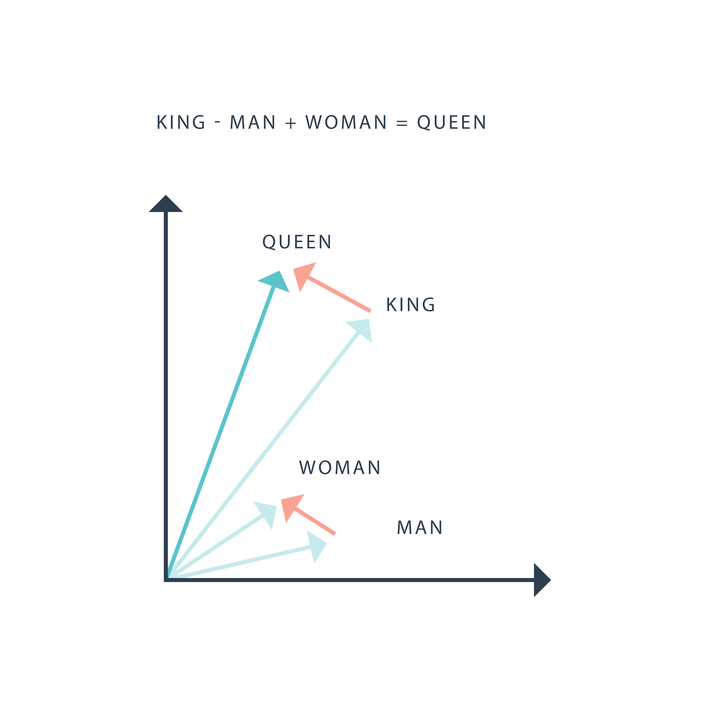![title](king_and_queen.png)

In [31]:
# mối quan hệ giữa người đứng đầu - giới tính
sim_words = word_vectors.most_similar_cosmul(positive=['queen', 'man'], negative=['king'])
print('Queen is a: ', sim_words[0][0])
sim_words

Queen is a:  woman


[('woman', 0.9245969653129578),
 ('lady', 0.8656635284423828),
 ('girl', 0.8601003289222717),
 ('woman.', 0.8287299871444702),
 ('ladies', 0.822723925113678),
 ('brunette', 0.8168299198150635),
 ('blonde', 0.8161004185676575),
 ('Woman', 0.8115742802619934),
 ('womans', 0.8087847232818604),
 ('men', 0.8083193898200989)]

- Nó sẽ tính toán dựa trên độ đo là cosine, cho ta thấy top các từ có mức độ đồng nghĩa từ cao đến thấp. Ở đây ta thấy từ `woman` hiện ra đầu tiên do đó `rep(queen) - rep(king)` gần như tương đương với `rep(woman) - rep(man)`
- Như vậy, về mặt không gian vector, ta có thể biểu diễn được mối quan hệ ngữ nghĩa của các từ một cách đáng ngạc nhiên. Quan hệ trên là: Người đứng đầu - Giới tính.

- Hoàn toàn tương tự, ta có thể khai thác được các mối quan hệ ngữ nghĩa khác như: Đất nước - Thủ Đô, Đất nước - món ăn, Công ty - Sản phẩm,... Ví dụ dưới đây minh hoạ cho mối quan hệ ngữ nghĩa: Đất nước - Thủ đô.

In [17]:
# mối quan hệ giữa quốc gia - thủ đô
sim_words = word_vectors.most_similar_cosmul(positive=['Vietnam', 'Berlin'], negative=['Germany'])
print('If Berlin is the capital of Germany then', sim_words[0][0], 'is the capital of Vietnam')
sim_words

If Berlin is the capital of Germany then Hanoi is the capital of Vietnam


[('Hanoi', 0.9318508505821228),
 ('Saigon', 0.8905898928642273),
 ('Danang', 0.8561213612556458),
 ('Vietnamese', 0.8540279865264893),
 ('VietNam', 0.8285140991210938),
 ('Hochiminh', 0.8211517930030823),
 ('Bangkok', 0.8155736327171326),
 ('Viet', 0.8127319812774658),
 ('Beijing', 0.8101763129234314),
 ('Hué', 0.8077791333198547)]

- Mô hình cho ra dự đoán tương tự cách tính như trên `rep(X)` = `rep(Vietnam) + rep(Berlin)` - `rep(Germany)`. Kết quả X là Hanoi. Do đó, mô hình trả về kết quả là thủ đô nước VN là Hanoi. Và đó là một fact!

**Welcome to Hanoi**

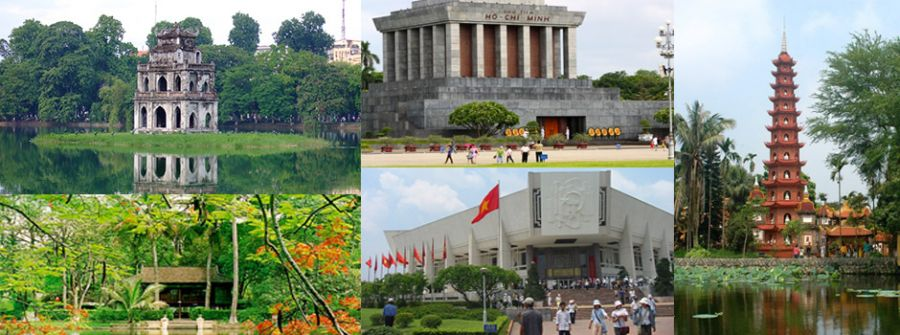

In [32]:
# mối quan hệ giữa quốc gia - món ăn
sim_words = word_vectors.most_similar_cosmul(positive=['Japan','pho'], negative=['Vietnam'])
print('If pho is the traditional food of Vietnam then', sim_words[0][0], 'is the traditional food of Japan')
sim_words

If pho is the traditional food of Vietnam then okonomiyaki is the traditional food of Japan


[('okonomiyaki', 0.9018792510032654),
 ('kaiseki', 0.8912520408630371),
 ('unagi', 0.8907097578048706),
 ('katsu', 0.8892642259597778),
 ('zushi', 0.8886470198631287),
 ('izakaya', 0.8864182829856873),
 ('gyoza', 0.8851907253265381),
 ('yakiniku', 0.8819529414176941),
 ('ryori', 0.8803180456161499),
 ('sushi', 0.8794767260551453)]

In [34]:
# mối quan hệ giữa họ - tên celeb
sim_words = word_vectors.most_similar_cosmul(positive=['Justin','Beckham'], negative=['Bieber'])
print('If Justin Bieber is the full name of superstar then', sim_words[0][0], 'is the first name of Beckham who is a superstar too')
sim_words

If Justin Bieber is the full name of superstar then David is the first name of Beckham who is a superstar too


[('David', 0.8938114643096924),
 ('Darren', 0.8433987498283386),
 ('Trevor', 0.8374736309051514),
 ('Ian', 0.8366765379905701),
 ('Brian', 0.830572783946991),
 ('Sean', 0.8275008797645569),
 ('Micah', 0.8273423314094543),
 ('James', 0.8268296718597412),
 ('Stephen', 0.8247759938240051),
 ('Mike', 0.8245529532432556)]

- Tương tự với tên của người nổi tiếng. Điều đó chắc chắn đúng với 2 chàng trai này nè!

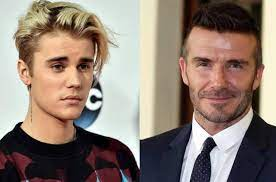

# **Thử nghiệm với mô hình cho tiếng Việt**
- Đối các ngôn ngữ khác, trong đó có tiếng Việt, ta có thể thử và tham khảo tại đây. Link tải: https://fasttext.cc/docs/en/crawl-vectors.html
- Tải và giải nén mô hình [crawl-vector](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz), với 157 ngôn ngữ, được huấn luyện bằng cách sử dụng CBOW với các trọng số vị trí, số chiều 300, với ký tự n-gam chiều dài là 5, được thu nhập từ các nguồn phổ biến như trên Wikipedia.
- Lưu ý: vì file zip khi tải xuống đã khá nặng, khoảng 4.2Gb, nên khi giải nén có thể có kích thước dung lượng lớn hơn nữa :))